<a href="https://colab.research.google.com/github/VarnikaKamra/ComputerVisionWorld/blob/main/Document_Scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Document Scanner using OpenCV#

1. Detect edges
2. Use the edges in the image to form contour (outline)
3. Apply a perspective transform to obtain to view of the document


In [3]:
#Import the required libraries

#from pyimagesearch.transform import four_point_transform
from skimage.filters import threshold_local
import numpy as np
import argparse
import cv2
import imutils #Functions for resizing, rotating and cropping images
from imutils.perspective import four_point_transform

In [52]:
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,help="/content/ss.PNG")
   # Instead of parsing arguments, directly assign the image path
args = {'image': '/content/ss.PNG'}

1. Edge Detection

STEP 1: Edge Detection


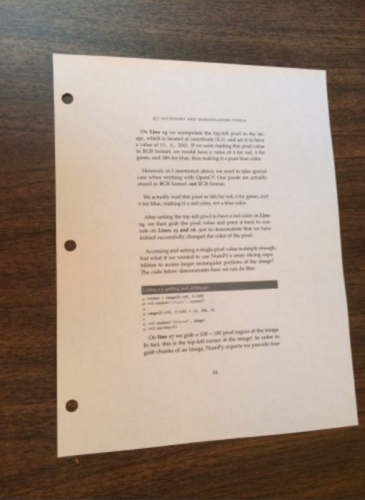

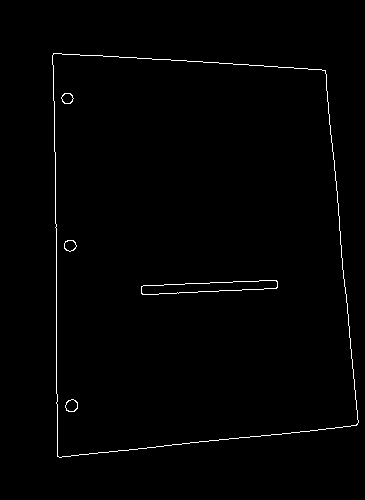

In [53]:
from google.colab.patches import cv2_imshow


# load the image and compute the ratio of the old height
# to the new height, clone it, and resize it
image = cv2.imread(args["image"])
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500) #Resized scanned im to 500 in order to speedup image processin and make edge detectiion more accurate


# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0) #Gaussian blur to remove high freuency noise
edged = cv2.Canny(gray, 75, 200) #Canny edge detection

# show the original image and the edge detected image
print("STEP 1: Edge Detection")
cv2_imshow(image)
cv2_imshow(edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

2. Finding the contours based on the image edges

STEP 2: Find contours of paper


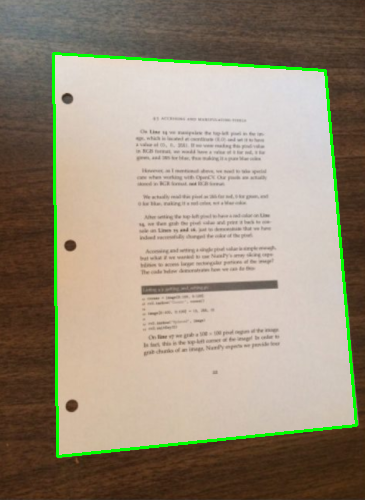

-1

In [54]:
# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

screenCnt = None #Document contour

# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True) #perimenter of the contour
	approx = cv2.approxPolyDP(c, 0.02 * peri, True) #aproximates the contour to a simplet olyon

	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break
# show the contour (outline) of the piece of paper
print("STEP 2: Find contours of paper")
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
cv2_imshow( image)
cv2.waitKey(0)



3. Apply Perspective transform

STEP 3: Apply perspective transform


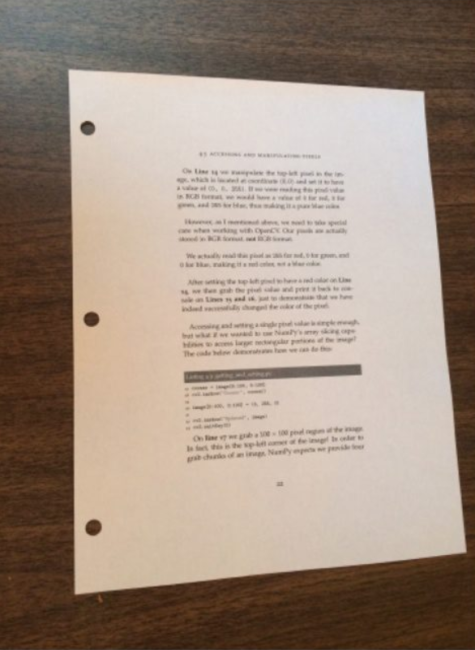

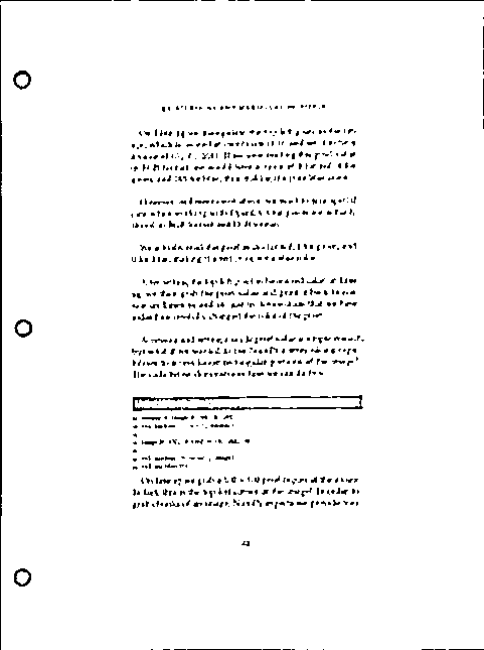

-1

In [55]:
# apply the four point transform to obtain a top-down
# view of the original image
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)
#reshape to a 4x2 matrix (x,y)coordinates
# *ratio to scale the image back to original size

# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255 #pixels above threshold are set to 255 (white), and below to 0 (black)

# show the original and scanned images
print("STEP 3: Apply perspective transform")
cv2_imshow(imutils.resize(orig, height = 650))
cv2_imshow(imutils.resize(warped, height = 650))
cv2.waitKey(0)